In [ ]:
#Projeto com Feedback 3 - Identificação de clientes insatisfeitos no início do relacionamento com o banco Santander.

In [1]:
!pip install imblearn

In [2]:
#Carregando os pacotes necessários
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importando o dataset
df = pd.read_csv('train.csv', sep = ',')

In [3]:
#Verificando as dimensões do conjunto de dados
df.shape

(76020, 371)

In [7]:
#Verificando o tipo do objeto df
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [55]:
#Verificando os tipos de dados. Temos apenas valores float e inteiros.
df.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [48]:
#Análise exploratória dos dados - resumo estatístico, correlação, balanceamento de classes, verificar se é
#necessário padronização/normalização, seleção de atributos e por fim avaliação com métricas de classificação.
df.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


In [4]:
#Resumo estatístico. Não quer dizer muita coisa já que as variáveis são anônimas
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
#Verificando a existência de valores missing. Ok, não temos valores missing.
df.isnull().sum()

ID                               0
var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0          

In [52]:
# Verificando a distribuição da variável target (necessidade ou não de balanceamento de classes).
#Será necessário balancear as classes visto que há uma discrepância grande entre 0 e 1, mas vou treinar o modelo primeiro
#com as classes desbalanceadas para ver como se comporta.
df.groupby('TARGET').size()

TARGET
0    73012
1     3008
dtype: int64

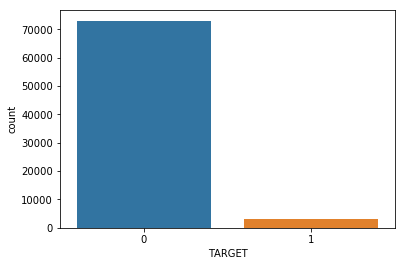

In [6]:
#Visualizando a informação acima em um gráfico. Claramente a classe está desbalanceada.
ax = sns.countplot(x="TARGET", data=df)

In [4]:
#Criando um modelo de regressão logística
lr= LogisticRegression()

In [5]:
#Criando duas variáveis: X que contém os dados de treino e y que contém somente a variável "TARGET" (que queremos prever)
X = df.drop("TARGET", axis = 1)
y = df['TARGET']

In [6]:
#Separando os dados em treino e teste. Mantendo o default que será 70% para treino e 30% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [7]:
#Treinamento do modelo
lr.fit(X_train, y_train)

LogisticRegression()

In [8]:
#Fazendo as previsões e salvando na variável "y_pred"
y_pred = lr.predict(X_test)

In [9]:
#Verificando a acurácia do modelo
accuracy_score(y_test, y_pred)

0.9604314654038411

In [10]:
#Relatório de classificação. Por este relatório podemos ver que o modelo está enviesado.
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18253
           1       0.00      0.00      0.00       752

    accuracy                           0.96     19005
   macro avg       0.48      0.50      0.49     19005
weighted avg       0.92      0.96      0.94     19005



In [11]:
#Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    All
Real                 
0        18253  18253
1          752    752
All      19005  19005


In [33]:
#Criando um dataset cópia para reiniciar o processo
df2=pd.read_csv('train.csv', sep = ',')

In [34]:
#Criando duas variáveis: X2 que contém os dados de treino e y2 que contém somente a variável "TARGET" (que queremos prever)
X2 = df2.drop("TARGET", axis = 1)
y2 = df2['TARGET']

In [35]:
#Criando a variável "balance"
balance=SMOTE()

In [36]:
#Aplicando o método SMOTE para o balanceamento de classes
X2, y2 = balance.fit_resample(X2,y2)

In [41]:
#Visualizando a nova distribuição de classes
y2.count()
X2.count()

ID                               146024
var3                             146024
var15                            146024
imp_ent_var16_ult1               146024
imp_op_var39_comer_ult1          146024
imp_op_var39_comer_ult3          146024
imp_op_var40_comer_ult1          146024
imp_op_var40_comer_ult3          146024
imp_op_var40_efect_ult1          146024
imp_op_var40_efect_ult3          146024
imp_op_var40_ult1                146024
imp_op_var41_comer_ult1          146024
imp_op_var41_comer_ult3          146024
imp_op_var41_efect_ult1          146024
imp_op_var41_efect_ult3          146024
imp_op_var41_ult1                146024
imp_op_var39_efect_ult1          146024
imp_op_var39_efect_ult3          146024
imp_op_var39_ult1                146024
imp_sal_var16_ult1               146024
ind_var1_0                       146024
ind_var1                         146024
ind_var2_0                       146024
ind_var2                         146024
ind_var5_0                       146024


In [42]:
#Dividindo novamente os dados entre treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 1, stratify=y2)

In [43]:
#Criando o segundo modelo
modelo2=LogisticRegression()

In [44]:
#Treino do modelo
modelo2.fit(X2_train, y2_train)

LogisticRegression()

In [45]:
#Previsões salvas na variável y2_pred
y2_pred = modelo2.predict(X2_test)

In [46]:
#Verificando a acurácia do modelo 2
result = modelo2.score(X2_test, y2_test)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 55.421%


In [47]:
print (classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53     18253
           1       0.55      0.60      0.58     18253

    accuracy                           0.55     36506
   macro avg       0.55      0.55      0.55     36506
weighted avg       0.55      0.55      0.55     36506



In [49]:
#Testando um novo algoritmo. Usando os dados balanceados para esse modelo
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 1, stratify=y2)

In [50]:
#Definindo o número de folds
num_folds = 7

In [51]:
# Separando os dados em folds
kfold = KFold(num_folds, True)

In [52]:
#Criando o modelo LDA
modelo3 = LinearDiscriminantAnalysis()

In [53]:
#Resultado
resultado = cross_val_score(modelo3, X2_train, y2_train, cv = kfold)

In [54]:
#Acurácia do modelo
print("Acurácia do modelo: %.3f" % (resultado.mean() * 100))

Acurácia do modelo: 83.916


In [59]:
#Previsões
previsoes = modelo3.fit(X2_test, y2_test)

In [64]:
#Confusion Matrix
print(pd.crosstab(y_test, previsoes, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  LinearDiscriminantAnalysis()    All
Real                                        
0                               18253  18253
1                                 752    752
All                             19005  19005
